In [10]:
#!/usr/bin/env python

In [11]:
import os
import sys
if os.path.exists('/home/chieh/code/wPlotLib'):
	sys.path.insert(0,'/home/chieh/code/wPlotLib')
if os.path.exists('/home/chieh/code/wuML'):
	sys.path.insert(0,'/home/chieh/code/wuML')

In [12]:
import wuml
from wuml.IO import *
from proj_tools import *
import numpy as np
import torch
import wplotlib
import torch.nn as nn
 

In [13]:
data = wuml.wData(xpath='./data/data_1_imputed.csv', batch_size=32, preprocess_data='center and scale',
					label_type='continuous', label_column_name='gestationAge',
					first_row_is_label=True)

In [14]:
wuml.jupyter_print('\n\nRun all regressors sorted by least test error')
result = wuml.run_every_regressor(data, alpha=0.1, gamma=0.05, l1_ratio=0.05)
wuml.jupyter_print(result['Train/Test Summary'])



Run all regressors sorted by least test error

Train mse  Test mse  Train r2 Score  Test r2 Score  \
RandomForest         3.1248    2.8840          0.1483        -0.0020   
Lasso                3.5733    2.8952          0.0261        -0.0059   
Elastic net          3.4981    2.9191          0.0466        -0.0142   
linear               3.4934    2.9390          0.0479        -0.0212   
Ridge                3.4934    2.9390          0.0479        -0.0212   
AdaBoost             4.1568    4.8381         -0.1329        -0.6810   
NeuralNet            1.4180   10.6767          0.6135        -2.7096   
Predef_NeuralNet     0.4067   11.0012          0.8891        -2.8224   
kernel ridge         1.9678   61.2333          0.4637       -20.2755   
GP                   0.0000  797.2439          1.0000      -276.0021   

                  Train avg abs error  Test avg abs error  Train max error  \
RandomForest                   1.1958              1.1001          15.7312   
Lasso                          1.2393              1.1054          16.1674   
Elastic net                    1.2249              1.1347          16.1401   
linear                         1.2271              1.1447          16.1354   
Ridge                          1.2271              1.1447          16.1354   
AdaBoost                       1.7381              1.7402           5.0400   
NeuralNet                      0.8309              1.8440          10.4381   
Predef_NeuralNet               0.4313              2.0369          10.4530   
kernel ridge                   1.0206              3.6360          12.7917   
GP                             0.0000             24.8187           0.0000   

                  Test max error  
RandomForest             13.4244  
Lasso                    13.4913  
Elastic net              13.1571  
linear                   13.0794  
Ridge                    13.0795  
AdaBoost                 13.1069  
NeuralNet                26.8898  
Predef_NeuralNet         24.0544  
kernel ridge             39.2857  
GP                       42.0000

In [15]:
model = result['RandomForest']

accuracy, precision, recall

In [16]:
ŷ = model(data)
gestational_precision_recall(ŷ, data.Y, print_out=True)
print('\n\n')


Precision: 1.000, Recall : 0.020




Show True label vs predicted label

In [17]:
YvY = model.show_true_v_predicted()
wuml.jupyter_print(YvY.df, display_all_rows=True)

Train y    Train ŷ  Train Error   Test y     Test ŷ  Test Error
0     22.8571  38.588330    15.731230  25.2857  38.710073   13.424373
1     25.7143  38.353181    12.638881  33.1429  39.293570    6.150670
2     26.7143  38.018774    11.304474  34.3000  39.138002    4.838002
3     27.8571  38.419832    10.562732  34.4000  39.156225    4.756225
4     23.2857  32.817587     9.531887  42.1429  38.526293    3.616607
5     28.8571  37.702855     8.845755  35.8571  39.114983    3.257883
6     30.0000  38.594038     8.594038  36.2857  39.286137    3.000437
7     30.4286  38.380988     7.952388  41.1429  38.244200    2.898700
8     30.7143  38.444446     7.730146  36.4286  39.277946    2.849346
9     24.4286  31.993016     7.564416  42.0000  39.154760    2.845240
10    31.1429  38.647736     7.504836  36.6000  39.401938    2.801938
11    31.4286  38.785199     7.356599  41.4286  38.735428    2.693172
12    31.1429  38.428389     7.285489  36.2857  38.754329    2.468629
13    31.7143  38.895779     7.181479  36.4286  38.883334    2.454734
14    31.5714  38.701679     7.130279  41.1429  38.721001    2.421899
15    31.7143  38.584905     6.870605  41.7143  39.299284    2.415016
16    32.0000  38.838703     6.838703  41.2857  38.878990    2.406710
17    31.7143  38.418968     6.704668  36.5714  38.828891    2.257491
18    26.0000  32.478702     6.478702  37.0000  39.182151    2.182151
19    32.0000  38.426318     6.426318  41.0000  38.818178    2.181822
20    31.4286  37.825768     6.397168  41.0000  38.917195    2.082805
21    32.2857  38.525731     6.240031  40.8571  38.817920    2.039180
22    32.5714  38.799845     6.228445  37.1429  39.157328    2.014428
23    32.5714  38.607929     6.036529  40.8571  38.901921    1.955179
24    33.2857  39.181891     5.896191  41.4000  39.476271    1.923729
25    32.8571  38.637680     5.780580  36.8571  38.747542    1.890442
26    33.2857  38.961341     5.675641  40.7143  38.824607    1.889693
27    33.2857  38.897447     5.611747  40.7143  38.825071    1.889229
28    32.8571  38.404208     5.547108  40.7143  38.826699    1.887601
29    33.7000  39.194277     5.494277  41.3000  39.438722    1.861278
30    33.6000  39.070509     5.470509  37.2857  39.116776    1.831076
31    33.2857  38.737179     5.451479  37.1000  38.918641    1.818641
32    33.2857  38.661106     5.375406  37.1429  38.946521    1.803621
33    33.2857  38.644143     5.358443  40.9000  39.099020    1.800980
34    33.7143  38.981043     5.266743  40.7143  38.958443    1.755857
35    34.0000  39.229495     5.229495  40.5714  38.837449    1.733951
36    34.1000  39.312148     5.212148  41.0000  39.288039    1.711961
37    33.4286  38.636589     5.207989  37.3000  38.978298    1.678298
38    33.5714  38.773466     5.202066  40.7143  39.078133    1.636167
39    33.4286  38.626862     5.198262  37.5714  39.165951    1.594551
40    33.3000  38.474941     5.174941  40.5714  39.073317    1.498083
41    33.8571  38.888000     5.030900  40.4286  38.957995    1.470605
42    33.7143  38.694740     4.980440  40.7143  39.299455    1.414845
43    34.1429  39.072249     4.929349  40.2857  38.877785    1.407915
44    33.8571  38.689425     4.832325  40.2857  38.887391    1.398309
45    33.8571  38.645400     4.788300  37.4286  38.825644    1.397044
46    34.4286  39.191731     4.763131  40.2857  38.890863    1.394837
47    34.2857  38.879717     4.594017  40.5714  39.184806    1.386594
48    34.0000  38.580547     4.580547  40.2857  38.903145    1.382555
49    34.2857  38.857424     4.571724  40.5714  39.202508    1.368892
50    34.4286  38.872133     4.443533  40.4286  39.074159    1.354441
51    33.8571  38.230907     4.373807  37.5714  38.923772    1.352372
52    34.4286  38.731751     4.303151  40.4286  39.083798    1.344802
53    34.2857  38.526242     4.240542  40.0000  38.687778    1.312222
54    35.1429  39.149210     4.006310  40.4286  39.121266    1.307334
55    35.0000  38.944867     3.944867  40.0000  38.728161    1.271839
56    42.8571  3

feature importance

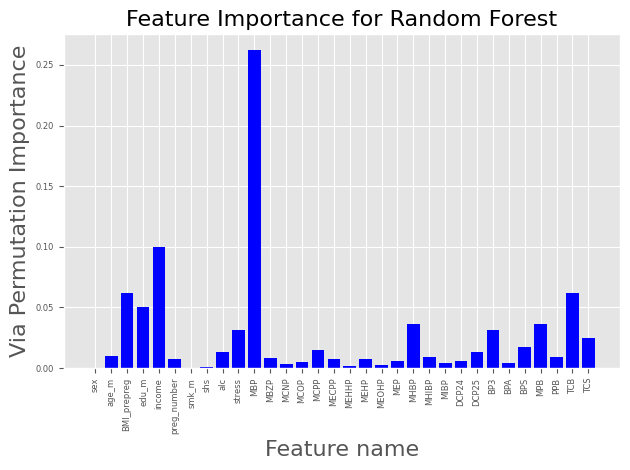

Coefficients
MBP              0.276950
income           0.121232
BMI_prepreg      0.060116
TCB              0.059608
edu_m            0.048345

In [18]:
cnames = data.get_column_names_as_a_list()
model.plot_feature_importance('Feature Importance for Random Forest', cnames, xticker_rotate=90, ticker_fontsize=6)
model.output_sorted_feature_importance_table(data.columns)